# Depth of investigation for airborne electromagnetic data

This notebook can be used to examine the Depth of Investigation (DOI) for Airborne Electromagnetic (AEM) data.
This python code is based on work completed by Oldenburg and Li (1999) and Hutchinson *et al.* (2010).


**Pre-requirements**

Two Layered Earth Inversions of the same AEM data line with different reference model conductivities. It is recommended that the reference conductivities should differ by at least two orders of magnitude. Other than differing reference conductivity, the two models should be the exactly the same. Models should be saved to your local drive. The two model files should be in column delineated ascii format with no header line and contain no non-numerics.


**Authorship**

This code was written in September 2017 by Erin Telfer with support from David McInnes and Ross C Brodie. The notebook was completed as a graduate program project at Geoscience Australia. If you find an error or if you have any suggestions, please contact erin.telfer@ga.gov.au. Alternatively, please contact david.mcinnes@ga.gov.au.



**Definitions**

AEM - Airborne Electromagnetic

DOI - Depth of investigation

PDI - Percentage data influence

RMIT - Reference model influence threshold

RC - Reference conductivity

"##" indicates cells that require user modification.

"#" indicates description of code.  No modification is required.



**References**

Hutchinson, D. K., Roach, I. C. and Costelloe, M. T., 2010. Depth of Investigation Grid for Regional Airborne Electromagnetic Surveys. Preview April 2010(145), 38-39.

Oldenburg, D. and Li, Y., 1999. Estimating depth of investigation in dc resistivity and IP surveys. Geophysics 64(2), 403–416.

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
import matplotlib as mpl

# User requirement: enter details for the first dataset

In [2]:
##User requirement: enter the following details for the first dataset

##Dataset location. Ensure "/" are used, not "\"
folder1= str(r"C:/Users/u67397/AnacondaProjects/aem/input_data/")

##Name of the datafile. Include the ".extension"
dat1= "1.dat"

##Reference model conductivity
reference_conductivity1 = 0.001

##Number of reference model layers
reference_layers= 30

# User requirement: enter details for the second dataset

In [3]:
##User requirement: enter the following details for the second dataset

##Dataset location. Ensure "/" are used, not "\"
folder2= str(r"C:/Users/u67397/AnacondaProjects/aem/input_data/")

##Name of the datafile. Include the ".extension"
dat2= "7.dat"

##Reference model conductivity
reference_conductivity2 = 0.1

# User requirement: enter the column location for certain data values

In [12]:
##User requirement: enter the column location within the datafile

line_column = 5 ##The column location of the "Line number"
easting_column = 7 ##The column location of "easting/x/longitude" values
northing_column = 8 ##The column location of "northing/y/latitude" values
elevation_column_min= 9 ##The first column containing "elevation" values
EM_column_min1= 22 ##The first column containing "model conductivity" values
depth_column_min1= 52 ##The first column containing "model layer thickness" values

# User requirement: enter folder location to save files

In [19]:
##User requirement: enter the output folder location. Ensure "/" are used, not "\"

output_folder= str(r"C:/Users/u67397/AnacondaProjects/aem/output_data/")

#  User requirement: enter reference model influence threshold

In [20]:
##User requirement: enter the reference model influence threshold (rmit) value as a percentage (%). 
##The rmit value relates to the amount of influence that the reference model conductivity has on the output model. 
##The final DOI is defined by this threshold. Values should be between 10 to 90. 
##The higher the threshold the tighter the assessment constraint reducing the resultant depth of investigation. 

rmit= 50

# No more user requirements... Just run the remaining cells

In [28]:
#location variables are defined. Because python locates columns starting at 0, rather than 1, column values are subtracted 

EM_column_min2= EM_column_min1 - 1 #Set the first location of EM column within input datafile
EM_column_max= EM_column_min2 + reference_layers #Set location of final EM column within input datafile

depth_column_min2= depth_column_min1 - 1 #Set the first location of depth column within input datafile
depth_column_max= depth_column_min2 + reference_layers # set location of final depth column within input datafile

line_column2 = line_column-1 #Set the location of the line title column within input datafile

easting_column2 =easting_column-1  #Set the location of the easting column within input datafile

northing_column2 = northing_column-1 #Set the location of the northing column within input datafile

In [29]:
#EM data is imported

#Import and format EM data for result one
input_dat1= folder1 + dat1 #Set variable made of folder location and datafile name
input_dataset1=pd.read_fwf(input_dat1, header=None) #Import data file
EM_dataset1=input_dataset1.iloc[:,EM_column_min2:EM_column_max].transpose().reset_index(drop=True) #Locate EM data, transpose and set index
datlen=len(input_dataset1.index) #Set variable made of dataset length

#Import and format EM data for result two
input_dat2= folder2 + dat2  #Set variable made of folder location and datafile name
input_dataset2=pd.read_fwf(input_dat2, header=None) #Import data file
EM_dataset2=input_dataset2.iloc[:,EM_column_min2:EM_column_max].transpose().reset_index(drop=True) #Locate EM data, transpose and set index

In [30]:
#Import and format depth/thickness data

thickness=input_dataset1.iloc[1:2,depth_column_min2:depth_column_max].transpose().reset_index(drop=True) #Locate thickness data, transpose and set index
thickness[1].iloc[-1] = thickness[1].iloc[-2] #Set the last thickness value as the second-to-last thickness value
depth=np.cumsum(thickness) #Create a cumulative sum of depth values
first_depth=int(depth[1].iloc[0]) #Set variable made of first depth
last_depth=int(depth[1].iloc[-1]) #Set variable of the last depth

In [31]:
#Import and format elevation data

elevation=input_dataset1.iloc[:,elevation_column_min:(elevation_column_min+1)].squeeze() #Locate elevation data, transpose and set index

In [32]:
#Calculate the data influence values

rdi = (np.log10(EM_dataset2)-np.log10(EM_dataset1)) / (np.log10(reference_conductivity2)- np.log10(reference_conductivity1)) #Calculate relative data influence
pdi = 100 * (1-rdi) #Calculate percentage data influence

In [33]:
#Search for the depth at which the inversion process reverts back to the reference model (as specified by rmit value)

doi=(np.abs(pdi - rmit)) #Find closest pdi value to rmit
doi['depth']=depth #Add depth to array
doi=doi.set_index('depth') #Set depth as index
doi=doi.idxmin(axis=0) #Return the index (depth) for the pdi value that is closest to rmit

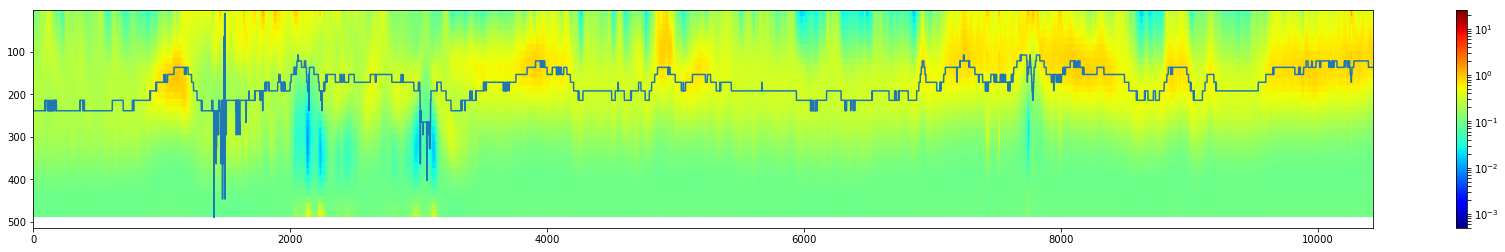

In [34]:
#A Layered Earth Inversion model figure (for one dataset) is created that contains the DOI line.
#Please note, the image is not draped to topography (e.g. not offset for elevation).

plt.figure(figsize =(30,4)) #Set size of figure
norm=mpl.colors.LogNorm(vmin=0.0005, vmax=25.01000) #Set min and max EM values
im = plt.imshow(EM_dataset2, aspect='auto', extent=[0,(datlen-1),last_depth,first_depth], 
                 norm=norm,
                 cmap=cm.jet) #Figure details 
plt.plot(doi) #Add depth of investigation line
plt.colorbar(im) #Add colourbar
plt.show() #Show plot

In [18]:
#create and save a .csv that contains the depth of investigation data profile (for input into display software such as
#Discover PA)

rl=doi.subtract(elevation).to_frame() #subtract elevation data from depth of investigation 
rl['rl_'+str(rmit)+'% (m)']=rl #reformat rl title
line = input_dataset1[line_column]# extra line name
line=str(line[0]) #extract line name
rl['line']=line #add line data to rl array
rl['easting']=input_dataset1[easting_column] #add easting data to rl array
rl['northing']=input_dataset1[northing_column] #add northing data to rl array
rl=rl.drop(rl.columns[[0]], axis=1) #reformat 
rl['total_depth_'+str(rmit)+'% (m)']=doi #add depth of investigation to rl array
rl=rl[['line','easting','northing',('total_depth_'+str(rmit)+'% (m)'),('rl_'+str(rmit)+'% (m)')]] #reorder columns

rl.to_csv(output_folder+'/'+line+'_depth_data.csv') #save doi data as csv